In [1]:
%reset -f
import sys
import numpy as np
sys.path.insert(0, '..')
from wavhandler import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
from utils_train import *
import deepdish as dd
import os
import glob
from natsort import natsorted
import matplotlib.pyplot as plt
print(os.listdir(BASE_DIR))
sns.set()

['Exp_swd_dmel_4', 'Leafminers', 'Wingbeats', 'Exp_swd_dmel_2', 'Exp_swd_dmel_1', 'Pcfruit', 'Thomas', 'LG', 'Exp_swd_dm_before', 'Exp_swd_dmel_3']


In [2]:
def compare_combinations(data1=None, data2=None, species1=None, species2=None):    
    dataset1 = Dataset(data1)
    dataset1.read(data=species1,loadmat=False)
    dataset1.make_array(setting='psd_dB');
    x1 = dataset1.psd_dB
    dataset2 = Dataset(data2)
    dataset2.read(data=species2,loadmat=False)
    dataset2.make_array(setting='psd_dB');
    x2 = dataset2.psd_dB
    y1 = dataset1.y.apply(lambda x: f'{x}_1')
    y2 = dataset2.y.apply(lambda x: f'{x}_2')
    
    return x1,x2,y1,y2

## SUZUKII DATA FROM DIFFERENT SENSORS

Species: D. suzukii.
Read 600 filenames in 0.01 seconds.
Species: D. suzukii.
Read 1000 filenames in 0.01 seconds.


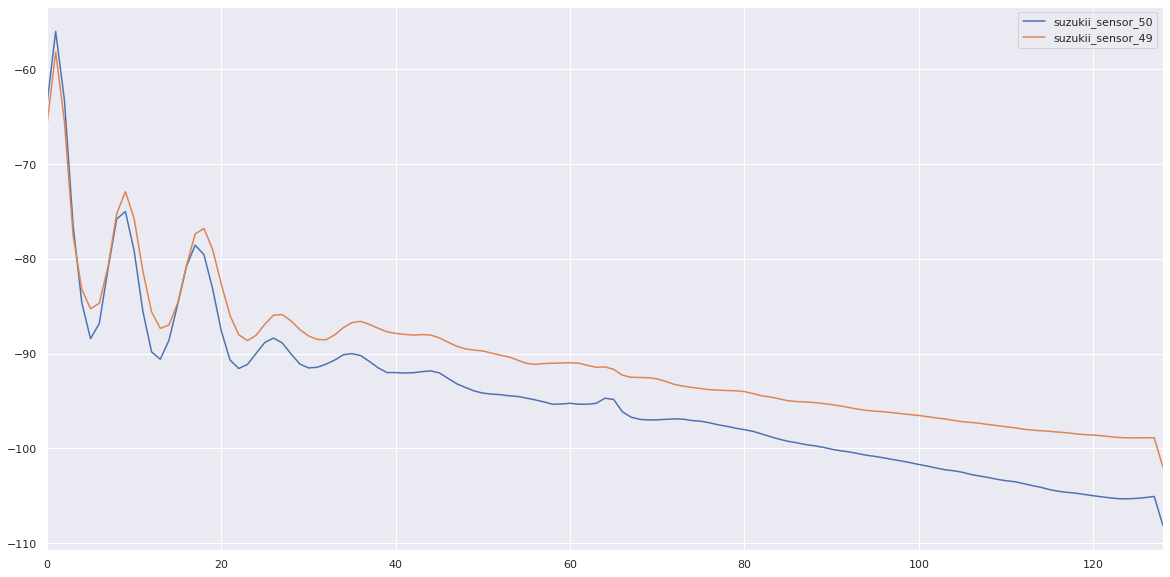

In [3]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_1', data2='Exp_swd_dmel_3', species1='D. suzukii', species2='D. suzukii')

plt.figure(figsize=(20,10))
x1.mean().plot()
x2.mean().plot()
plt.legend(['suzukii_sensor_50','suzukii_sensor_49'])

## MELANOGASTER DATA FROM DIFFERENT SENSORS

Species: D. melanogaster.
Read 600 filenames in 0.01 seconds.
Species: D. melanogaster.
Read 1000 filenames in 0.01 seconds.


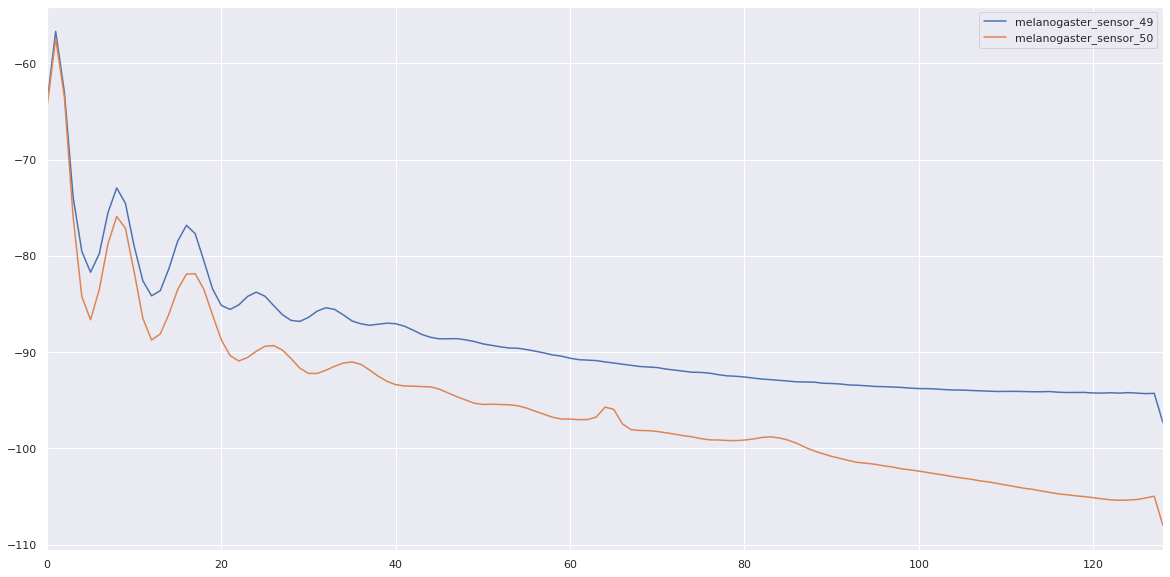

In [4]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_1', data2='Exp_swd_dmel_3', species1='D. melanogaster', species2='D. melanogaster')

plt.figure(figsize=(20,10))
x1.mean().plot()
x2.mean().plot()
plt.legend(['melanogaster_sensor_49','melanogaster_sensor_50'])

## Melanogaster vs Suzukii same sensor

Species: D. melanogaster.
Read 1000 filenames in 0.01 seconds.
Species: D. suzukii.
Read 600 filenames in 0.01 seconds.


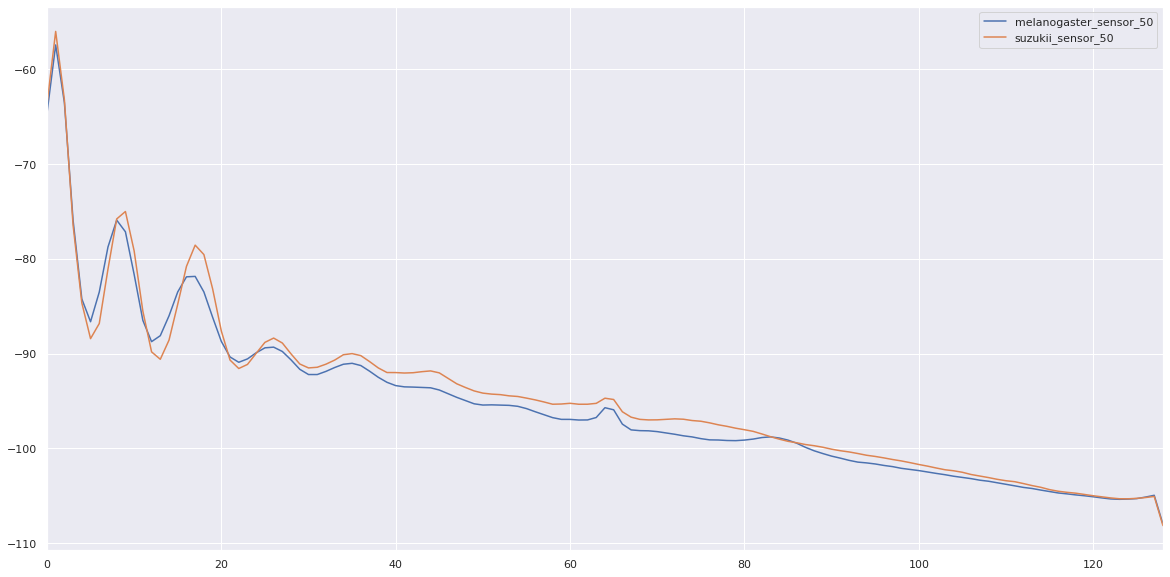

In [5]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_3', data2='Exp_swd_dmel_1', species1='D. melanogaster', species2='D. suzukii')

plt.figure(figsize=(20,10))
x1.mean().plot()
x2.mean().plot()
plt.legend(['melanogaster_sensor_50','suzukii_sensor_50'])

## Melanogaster vs Suzukii different sensor (first combination)

Species: D. melanogaster.
Read 600 filenames in 0.01 seconds.
Species: D. suzukii.
Read 600 filenames in 0.01 seconds.


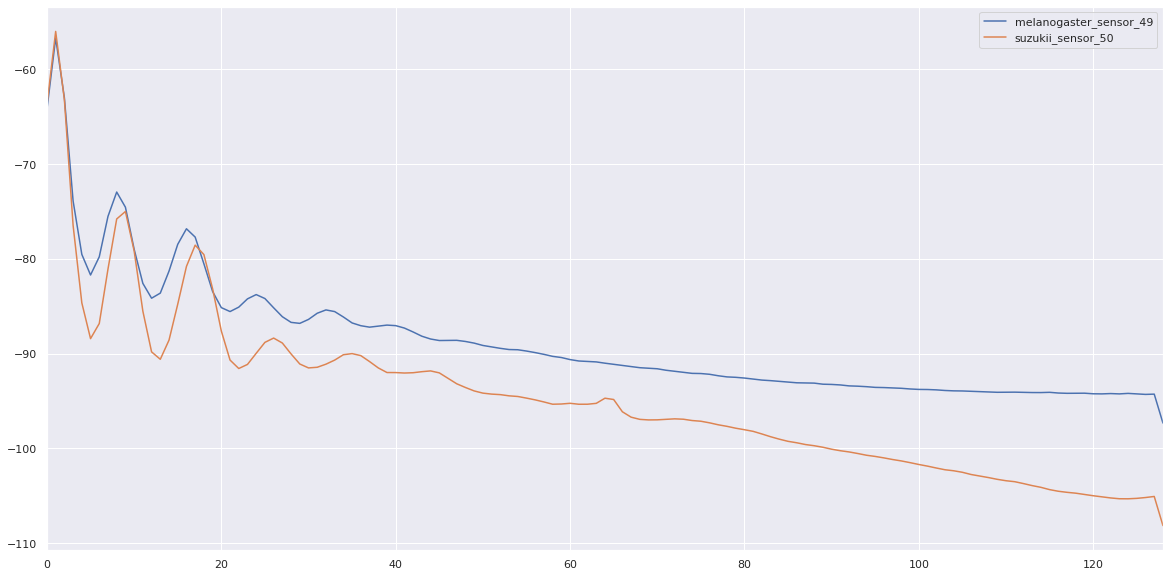

In [6]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_1', data2='Exp_swd_dmel_1', species1='D. melanogaster', species2='D. suzukii')

plt.figure(figsize=(20,10))
x1.mean().plot()
x2.mean().plot()
plt.legend(['melanogaster_sensor_49','suzukii_sensor_50'])

## Suzukii vs Suzukii same sensor, different trial

Species: D. suzukii.
Read 600 filenames in 0.01 seconds.
Species: D. suzukii.
Read 630 filenames in 0.04 seconds.


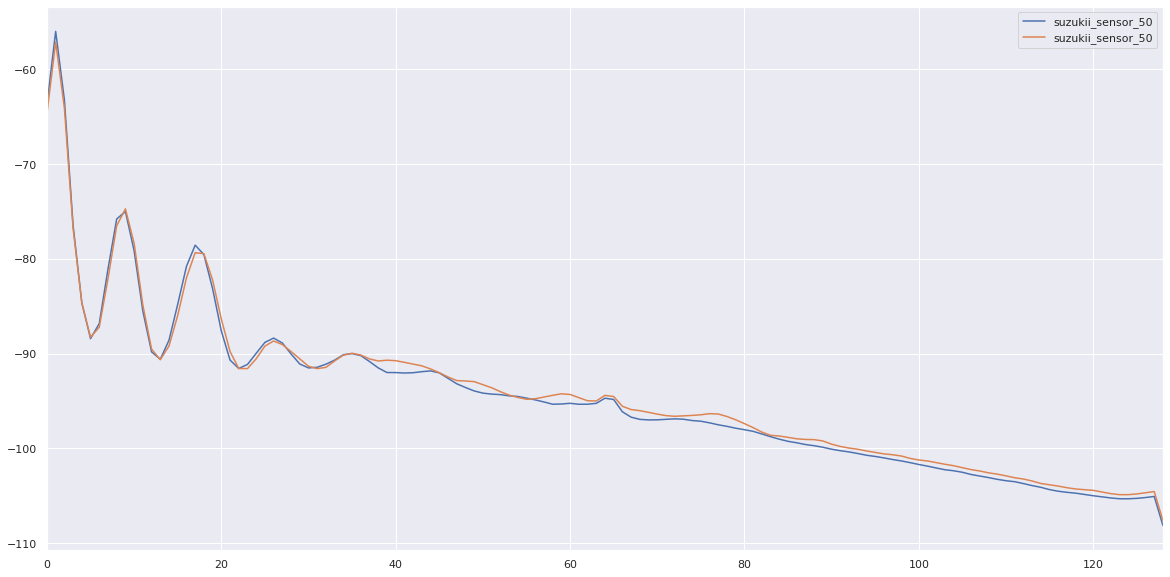

In [7]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_1', data2='Exp_swd_dmel_2', species1='D. suzukii', species2='D. suzukii')

plt.figure(figsize=(20,10))
x1.mean().plot()
x2.mean().plot()
plt.legend(['suzukii_sensor_50','suzukii_sensor_50'])

## Checking combination 4

Species: D. suzukii.
Read 970 filenames in 0.01 seconds.
Species: D. melanogaster.
Read 980 filenames in 0.04 seconds.


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,-0.814099,-0.34887,-1.465443,-0.566803,2.51493,2.653419,-0.683377,-2.677138,0.111077,4.509965,...,11.064629,11.125425,11.197485,11.263191,11.281725,11.300962,11.213794,10.985533,10.849331,10.877601


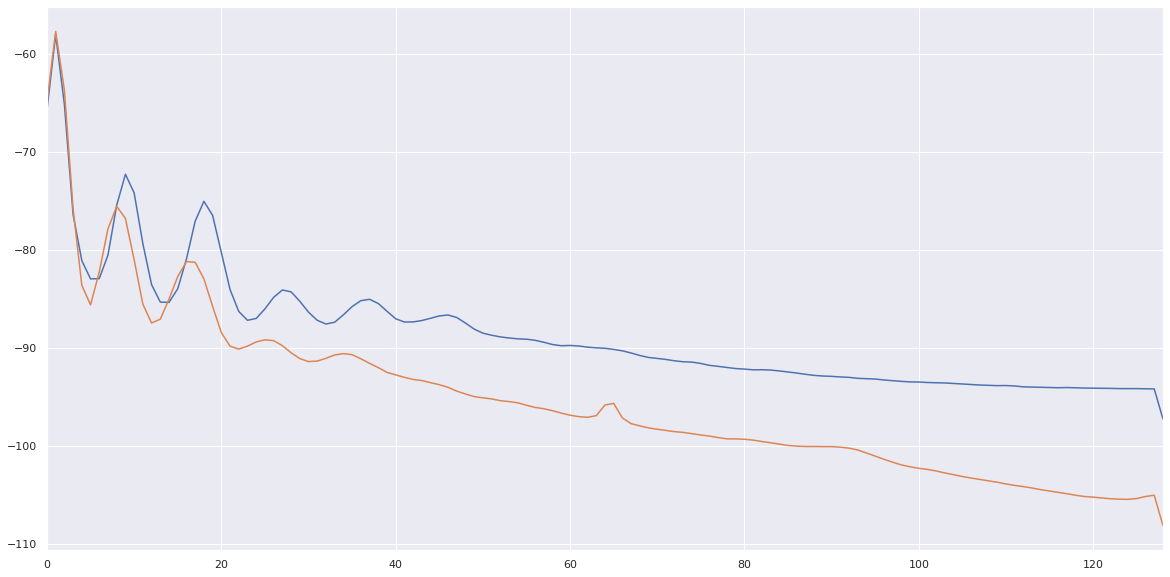

In [8]:
x1,x2,y1,y2 = compare_combinations(data1='Exp_swd_dmel_4', data2='Exp_swd_dmel_4', species1='D. suzukii', species2='D. melanogaster')

plt.figure(figsize=(20,10))
x1.mean().plot()
x2.mean().plot()
# plt.legend(['suzukii_sensor_50','suzukii_sensor_49'])
pd.DataFrame([x1.mean() - x2.mean()]).head(15)

# WORK IN PROGRESS

# PCA analysis on any of the above

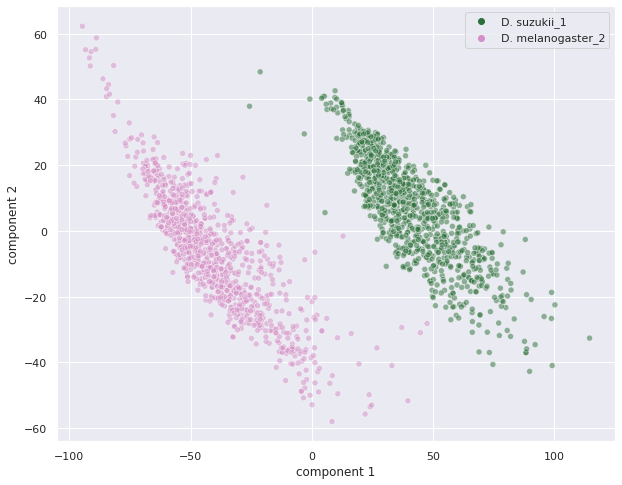

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = pd.concat([x1, x2])
y = pd.concat([y1, y2])

X_std = StandardScaler(with_std=False).fit_transform(X)  # standardization of data

pca = PCA(n_components=2)

X_final =pca.fit_transform(X_std)

plt.figure(figsize=(10,8))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                hue=y,
                palette=sns.color_palette("cubehelix", 2)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

# -------------------------------------------------------------------------------------------------------------------------------

# Check combination 3 data which seemed to have mixed insects in one class

In [10]:
data = Dataset('Exp_swd_dmel_3')
data.read(loadmat=False)
data.get_sensor_features()
data.make_array(setting='psd_dB');
data.make_array(setting='raw');
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.psd_dB['y_dates'] = data.df_features[['date_day']]
data.psd_dB['y'] = data.y

Species: all.
Read 2000 filenames in 0.01 seconds.


## PCA on one insect, coloring based on 'hour' OR 'day' collected

In [11]:
selection = 'D. suzukii'
sub = data.psd_dB
sub['y_hours'] = data.df_features[['date_hour']]
sub = sub[sub.y == f'{selection}']
print(f'selected insect: {selection}')

selected insect: D. suzukii


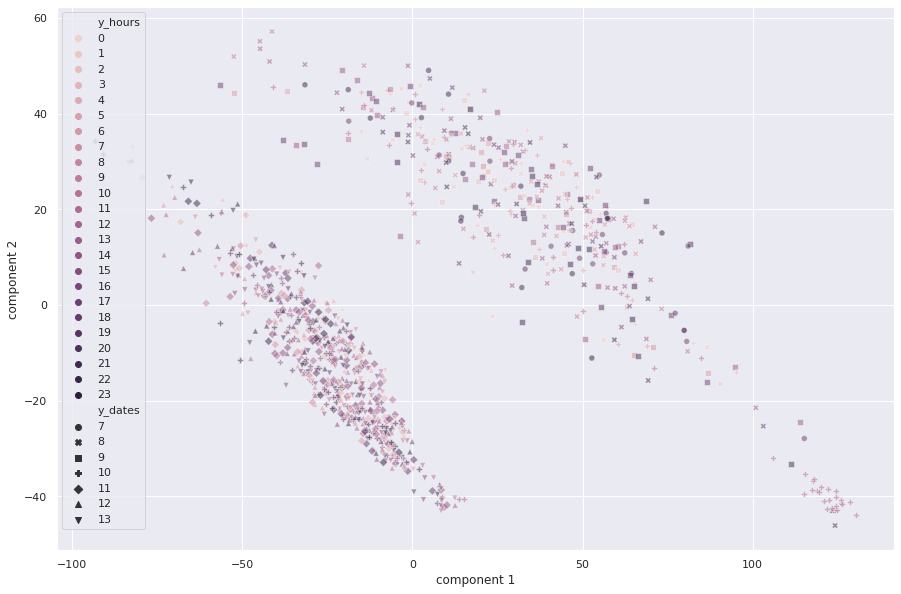

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = sub.iloc[:,:-3].values

X_std = StandardScaler(with_std=False).fit_transform(X)  # standardization of data (using covariance matrix)

pca = PCA(n_components=2)

X_final =pca.fit_transform(X_std)

plt.figure(figsize=(15,10))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                style=sub.y_dates,
#                 size=sub.y_hours,
                hue=sub.y_hours, # HERE SELECT HOURS OR DAYS
               )#palette=sns.color_palette("cubehelix", 8)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

## PCA on both insects

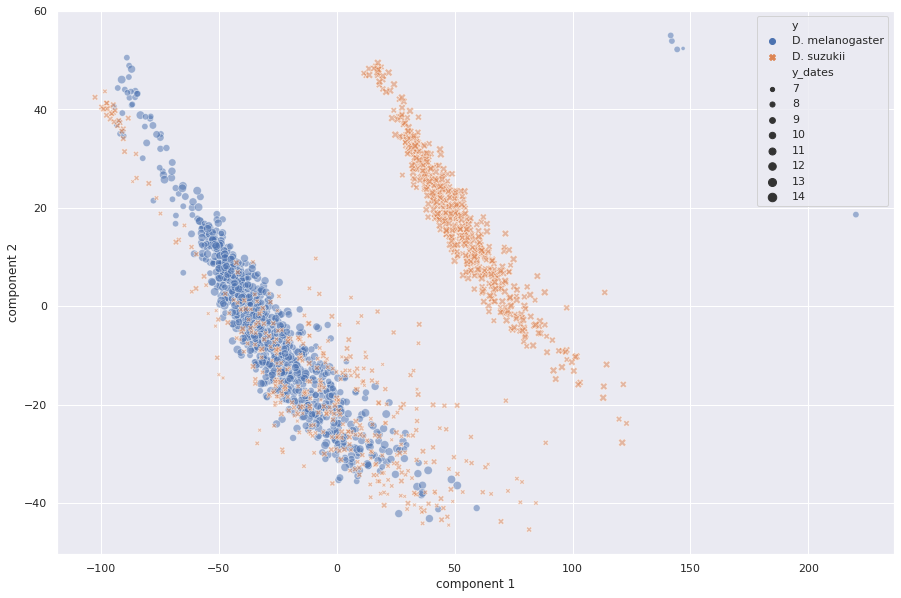

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.psd_dB.iloc[:,:-2].values

X_std = StandardScaler(with_std=False).fit_transform(X)  # standardization of data (using covariance matrix)

pca = PCA(n_components=2)

X_final =pca.fit_transform(X_std)

plt.figure(figsize=(15,10))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                style=data.psd_dB.y,
                size=data.psd_dB.y_dates,
                hue=data.psd_dB.y,
               )#palette=sns.color_palette("cubehelix", 8)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

### same figure different style

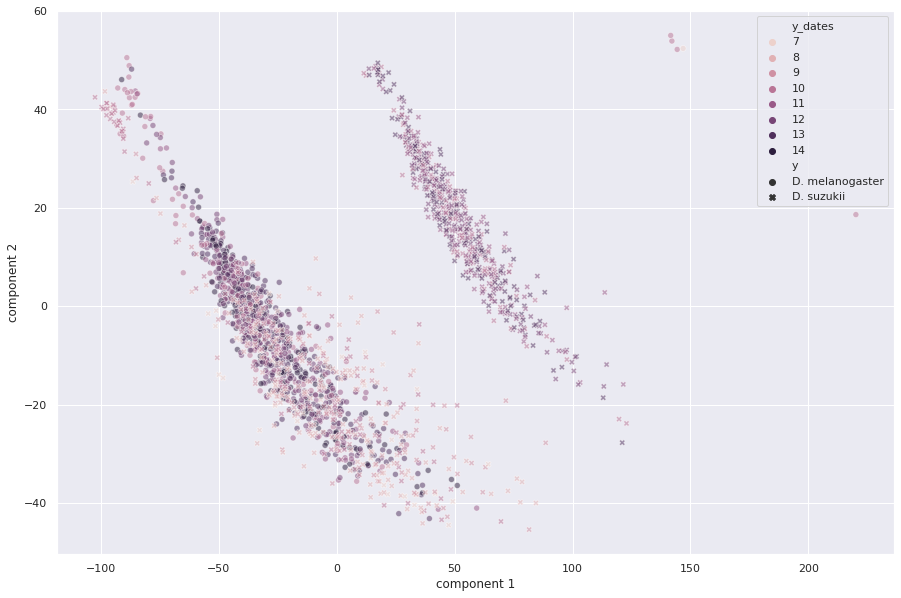

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(X_final[:,0], X_final[:,1],
                alpha=0.5, 
                legend='full', 
                style=data.psd_dB.y,
#                 size=data.psd_dB.y_dates,
                hue=data.psd_dB.y_dates,
               )#palette=sns.color_palette("cubehelix", 8)) 
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

In [15]:
data.df_features['y'] = data.y

In [16]:
data.df_features[data.df_features.y == 'D. suzukii'].date_day.value_counts()

10    197
13    167
11    165
8     165
12    161
9     105
7      40
Name: date_day, dtype: int64

In [17]:
data.df_features[data.df_features.y == 'D. melanogaster'].date_day.value_counts()

13    315
12    194
14    175
11    160
10    155
7       1
Name: date_day, dtype: int64

# -------------------------------------------------------------------------------------------

# All data together - Build predictive model

In [18]:
print(os.listdir(BASE_DIR))

data1 = Dataset('Exp_swd_dmel_1'); data1.read(loadmat=False); data1.make_array(setting='psd_dB');
data2 = Dataset('Exp_swd_dmel_2'); data2.read(loadmat=False); data2.make_array(setting='psd_dB');
data3 = Dataset('Exp_swd_dmel_3'); data3.read(loadmat=False); data3.make_array(setting='psd_dB');
data4 = Dataset('Exp_swd_dmel_4'); data4.read(loadmat=False); data4.make_array(setting='psd_dB');

['Exp_swd_dmel_4', 'Leafminers', 'Wingbeats', 'Exp_swd_dmel_2', 'Exp_swd_dmel_1', 'Pcfruit', 'Thomas', 'LG', 'Exp_swd_dm_before', 'Exp_swd_dmel_3']
Species: all.
Read 1200 filenames in 0.00 seconds.
Species: all.
Read 1260 filenames in 0.00 seconds.
Species: all.
Read 2000 filenames in 0.00 seconds.
Species: all.
Read 1950 filenames in 0.00 seconds.


In [19]:
data1.psd_dB['sensor'] = data1.y.apply(lambda x: f'49' if x == 'D. melanogaster' else f'50')
data2.psd_dB['sensor'] = data2.y.apply(lambda x: f'49' if x == 'D. melanogaster' else f'50')
data3.psd_dB['sensor'] = data3.y.apply(lambda x: f'50' if x == 'D. melanogaster' else f'49')
data4.psd_dB['sensor'] = data4.y.apply(lambda x: f'50' if x == 'D. melanogaster' else f'49')
data1.psd_dB['y'] = data1.y
data2.psd_dB['y'] = data2.y
data3.psd_dB['y'] = data3.y
data4.psd_dB['y'] = data4.y

In [20]:
df = pd.concat([data1.psd_dB, data2.psd_dB, data3.psd_dB, data4.psd_dB])
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['sensor'] = le.fit_transform(X['sensor'])
X.columns = pd.Series(X.columns).apply(lambda x: f'frequency_bin_{x}' if not str(x).endswith('sor') else x)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

estimator = RandomForestClassifier(n_estimators=50, n_jobs=8) #LogisticRegression(solver='lbfgs', n_jobs=-1)
estimator.fit(X, y)
cross_val_score(estimator, X, y, cv=5)

array([0.39781591, 0.59126365, 0.73790952, 0.7698908 , 0.74882995])

In [34]:
feature_importances = pd.DataFrame(estimator.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [35]:
print(feature_importances.shape)
feature_importances.head(15)

(130, 1)


,importance
frequency_bin_6,0.033854
frequency_bin_19,0.033586
frequency_bin_77,0.023300
frequency_bin_7,0.020708
sensor,0.018382
frequency_bin_15,0.018203
frequency_bin_76,0.017992
frequency_bin_18,0.017078
frequency_bin_14,0.016641
frequency_bin_78,0.016096
